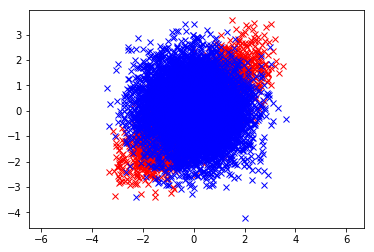

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

    
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]


TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])

plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.plot(TestData[:,0], TestData[:,1], 'o', color='k')
plt.axis('equal')
plt.show()
 
X = np.concatenate((TrainingData0[:, 0:2], TrainingData1[:, 0:2]), axis = 0)       
Y = np.concatenate((TrainingData0[:, 2], TrainingData1[:, 2]), axis = 0)



In [2]:
'''
3NN classifier
'''
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)
result_3NN = neigh.predict(TestData)
apparent_error_3NN = 1 - neigh.score(X, Y)

'''
SVM classifier
'''
clf = svm.SVC()
clf.fit(X, Y)
apparent_error_SVM = 1 - clf.score(X, Y)
result_SVM = clf.predict(TestData)

'''
LDA
'''
clf_LDA = LDA()
clf_LDA.fit(X, Y)
result_LDA = clf_LDA.predict(TestData)
apparent_error_LDA = 1 - clf_LDA.score(X, Y)

'''
QDA
'''
clf_QDA = QDA()
clf_QDA.fit(X, Y)
result_QDA = clf_QDA.predict(TestData)
apparent_error_QDA = 1 - clf_QDA.score(X, Y)
QDA_label = np.zeros((5000,1))
QDA_label[:,0]= clf_QDA.predict(TestData)


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [ ]:
#Save the data
Predict_data = np.concatenate((TestData, QDA_label), axis = 1)
All_data = np.concatenate((np.concatenate((TrainingData0, TrainingData1), axis = 0), Predict_data), axis = 0)
df_new=pd.DataFrame({'Y0':All_data[:,0],'Y1':All_data[:,1],'label':All_data[:,2]})
df_new.to_csv("1challenge.csv")